### 4.i

#### a) [8 points] Use Python to plot the life expectancy data of the United States against time from 1981 to 2010, i.e., the vertical axis is life expectancy and the horizontal axis is time in years from 1981 to 2010.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore") 

In [2]:
#read in data
os.chdir("/Users/vinceverdugo/Downloads/mathmodeling")
expData = \
    pd.read_csv("data/LifeExpectancy19602020.csv",
                                   header=2, index_col=0)

In [3]:
#Since data from 1960 begins at column 4, we want to start at column 25 (4+21) and end at 55 (30 years)
#Use .loc to get row data since they are named rows, then use .iloc to get columns since they are indexed
usRow = expData.loc['United States']
usData = np.array(usRow.iloc[25:55])
#Array of years
years = np.arange(1981,2011)

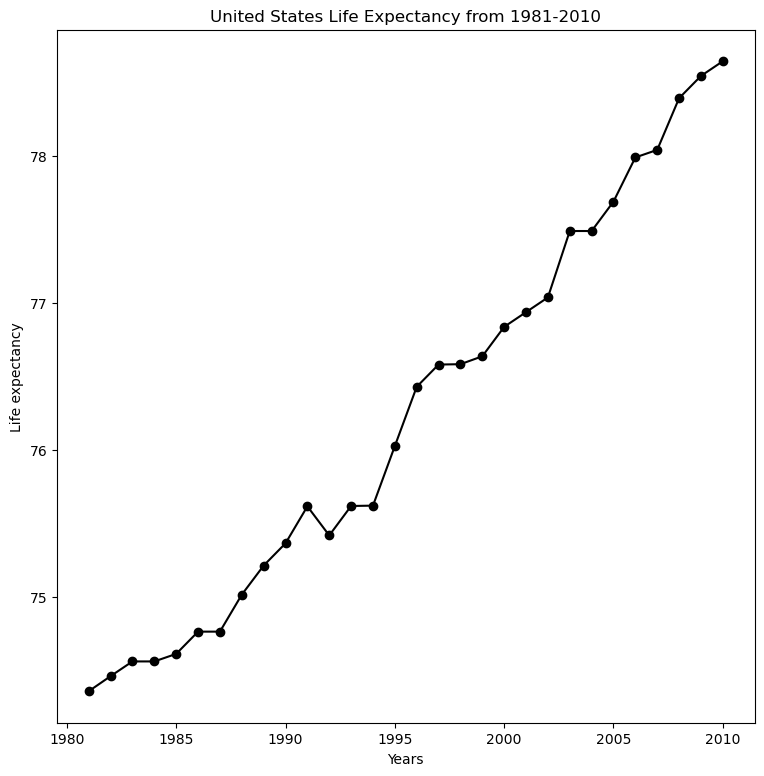

In [4]:
plt.figure(figsize=(9,9))
plt.plot(years, usData, 'k-o')
plt.title("United States Life Expectancy from 1981-2010")
plt.xlabel("Years")
plt.ylabel("Life expectancy")
plt.savefig("US_Life_Expectancy_a_336_MT.jpg", bbox_inches='tight')

#### b) [5 points] Use Python and linear regression to find the change rate of life expectancy for the United States during the period of 1981 - 2010. Use the units [years per decade] in your answer. Copy your Python solution results to your Python code as comment lines after #.

In [5]:
#Using linear model from book
def linear_model(x):
    return lambda t: x[0]*t + x[1]

#Create linear trend function
trend = np.polyfit(years, usData.astype(float), 1)
expectancy = linear_model(trend)
#Find rate of change per decade
roc = trend[0]*10

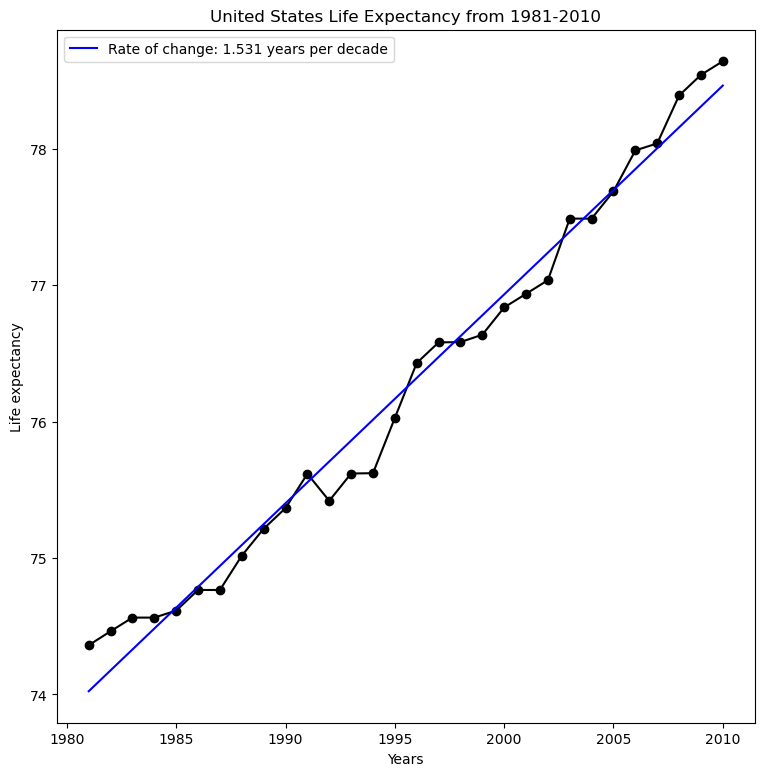

In [6]:
plt.figure(figsize=(9,9))
plt.plot(years, usData, 'k-o')
plt.plot(years, expectancy(years), 'b-', label = f"Rate of change: {roc:.3f} years per decade")
plt.title("United States Life Expectancy from 1981-2010")
plt.xlabel("Years")
plt.ylabel("Life expectancy")
plt.legend(loc='best')
plt.savefig("US_Life_Expectancy_b_336_MT.jpg", bbox_inches='tight')

### 4.ii
#### Use Python and the given dataset EarthTemperatureData.txt downloadable from the Canvas’ Assignment/Midterm block to plot a figure similar to Fig. 2 but for February and with the following requirements.

#### (a) Replace “Samuel Shen” and “December” in the main title with your name and February.
#### (b) Change the curve’s color from black to blue and use linewidth=3.
#### (c) Compute the linear trend of the February temperature anomalies for the entire period from 1850 to 2015.
#### (d) Change the linear trend line’s color from black to red, and use linewidth=4 for the trend line.
#### (e) Change the text “December trend = 0.52 deg C/century” to “February trend = ?? deg /Century”, and use the trend calculated from Step c) in the position ”??”.
#### (f) Save the figure and include the figure in your solution PDF file.

In [7]:
#Read .txt file
earthData = \
    pd.read_csv("data/EarthTemperatureData.txt", sep="\s+", header=0)

In [8]:
#Create array of February temperatures
febTemps = np.array(earthData.iloc[:,2])
#Years array
tYears = np.arange(1850,2016)

In [9]:
#STEP (c)
#Make linear trend function for temperature
tTrend = np.polyfit(tYears, febTemps.astype(float), 1)
templinTrend = linear_model(tTrend)
#Calculate linear trend per century
cenTrend = tTrend[0]*100

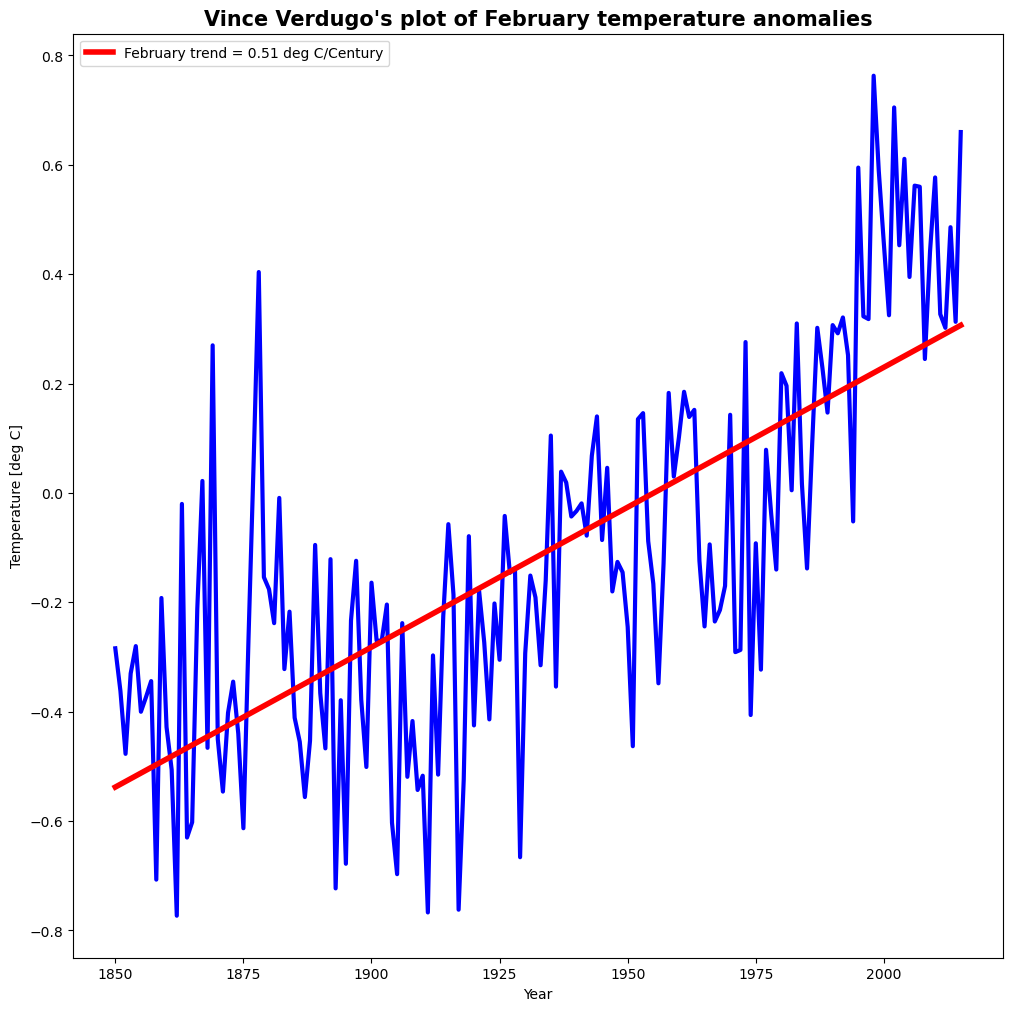

In [10]:
plt.figure(figsize=(12,12))
#STEP (b)
plt.plot(tYears, febTemps, 'b-', linewidth=3)
#STEP (d,e)
plt.plot(tYears, templinTrend(tYears), 'r-', linewidth=4,
        label = f"February trend = {cenTrend:.2f} deg C/Century")
#STEP (a)
plt.title("Vince Verdugo's plot of February temperature anomalies",size=15,fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Temperature [deg C]")
plt.legend(loc='upper left')
#STEP (f)
plt.savefig("Feb_Temp_Anomalies_336MT.jpg", bbox_inches='tight')

#### (g) Plot the histogram of the February temperature anomalies from 1850 to 2015 The title of the figure is “Histogram of the February Temperature Anomalies.” The x-label is “Temperature anomalies [deg C].” The y-label is “Frequency.”
#### (h) Save the histogram figure and include the figure in your solution PDF file.

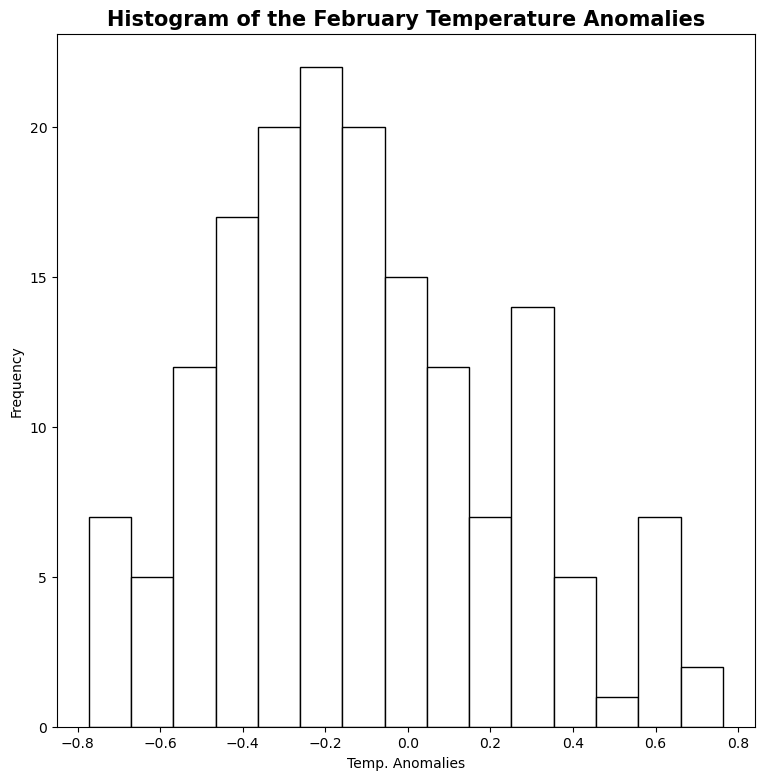

In [11]:
plt.figure(figsize=(9,9))
#STEP (g)
#Since febTemps has 166 data points, 15 bins should be good
plt.hist(febTemps, bins=15, facecolor='w', edgecolor='k', rwidth=1, align='mid')
plt.xlabel("Temp. Anomalies")
plt.ylabel("Frequency")
plt.title("Histogram of the February Temperature Anomalies",size=15, fontweight="bold")
#STEP (h)
plt.savefig("Feb_Temp_Anomalies_Histogram_336MT.jpg", bbox_inches='tight')